# EDA del Dataframe df_homicidios limpio

<br>
<br>

En este apartado se propone analizar patrones dentro de los datos proporcionados buscando reconocer las distribuciones de las víctimas en función del tiempo, de la cantidad de accidentes, de las caracteristicas de las victimas, de los roles involucrados y el punto de ocurrencia de los hechos.

<br>
<br>

Se importan las librerías

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

<br>
<br>

Se carga el Dataframe limpio

In [5]:
# Se extrae el dataframe
df_homicidios = pd.read_csv(r"C:\Users\Cebol\OneDrive\Escritorio\PI_02_siniestros\Datasets\homicidios_limpio.csv")

<br>
<br>

#### Se analiza el dataframe

In [6]:
df_homicidios.describe()

,Nro Víctimas,Año,Hora,Comuna,Pos x,Pos y,Edad
count,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000
mean,1.123522,2018.145861,11.345598,7.427070,-57.289723,-33.937414,41.628121
std,0.363443,1.650681,6.691128,4.383912,8.129158,4.815617,18.950898
min,1.000000,2016.000000,0.000000,1.000000,-58.529942,-34.705250,1.000000
25%,1.000000,2017.000000,6.000000,4.000000,-58.476178,-34.643583,28.000000
50%,1.000000,2018.000000,11.000000,8.000000,-58.442540,-34.622002,38.000000
75%,1.000000,2019.000000,17.000000,11.000000,-58.398726,-34.595117,54.000000
max,3.000000,2021.000000,23.000000,15.000000,0.000000,0.000000,95.000000


<br>
<br>

#### Análisis de las  Variables 

<br>
<br>

Histograma de la variable Edad

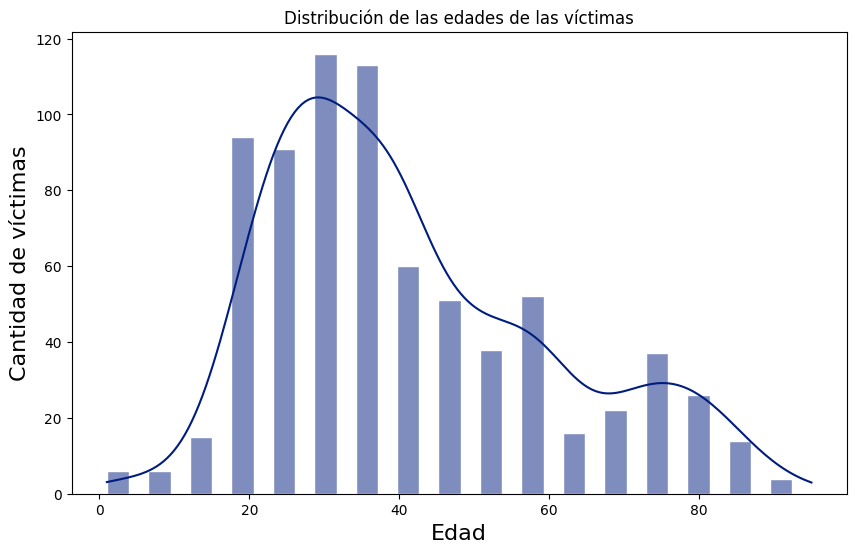

In [7]:
# Establecer la paleta de colores
sns.set_palette("dark")

# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(data=df_homicidios, x='Edad', kde=True)
plt.title('Distribución de las edades de las víctimas')
plt.xlabel('Edad', fontsize=16)  # Ajustar el tamaño de la fuente en el eje x
plt.ylabel('Cantidad de víctimas', fontsize=16)  # Ajustar el tamaño de la fuente en el eje y

# Ajustar el ancho de las columnas y los colores
bars = plt.gca().patches
for bar in bars:
    bar.set_width(3)  # Ajustar el ancho de las columnas
    bar.set_edgecolor('white')  # Ajustar el color del borde de las columnas

plt.show()

<br>
<br>

Boxplot de la variable Edad

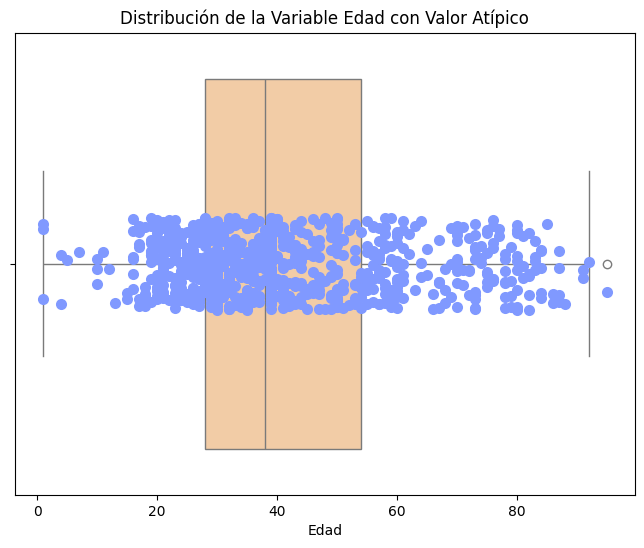

In [8]:
# Establecer la paleta de colores
light_orange = (1.0, 0.8, 0.6)  # Valores RGB para un color naranja apagado y pastel
light_blue = (0.5, 0.6, 1.0)  # Valores RGB para un color celeste pastel

plt.figure(figsize=(8, 6))
sns.boxplot(x=df_homicidios['Edad'], color=light_orange)
sns.stripplot(x=df_homicidios['Edad'], color=light_blue, marker='o', size=8)
plt.xlabel('Edad')
plt.title('Distribución de la Variable Edad con Valor Atípico')
plt.show()

La variable "Edad" tiene una distribución simétrica con una mediana de 38 años, encontrándose la mayoría de las edades entre 28 y 54 años.
Existe un valor atípico de 95 años según el gráfico, que decido dejarlo tal cual está, dado que es una edad alcanzable por el ser humano, considero que es un dato real, y no me afecta en mis mediciones.

<br>
<br>

Gráfico de barras con el recuento de víctimas por año

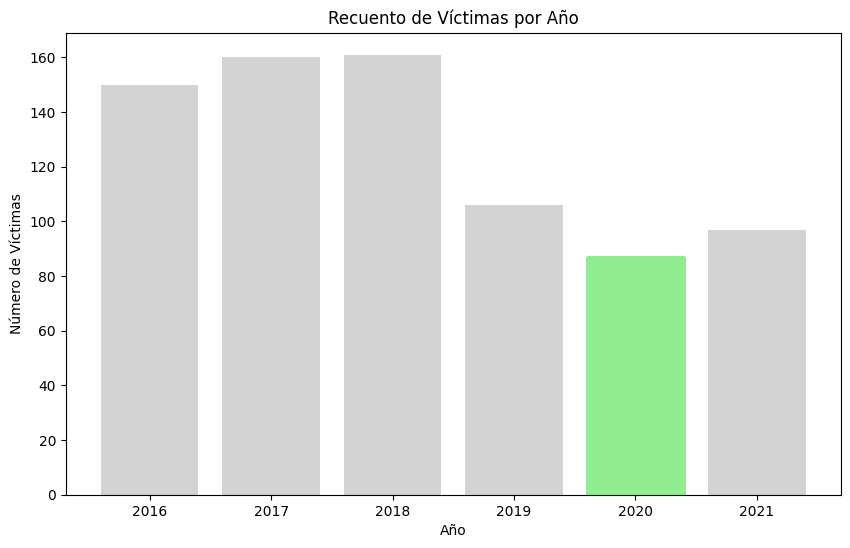

In [9]:
# Crear una nueva columna con el recuento de víctimas por año
df_homicidios['Recuento de Víctimas'] = df_homicidios.groupby('Año')['Nro Víctimas'].transform('count')

# Obtener el año con el menor recuento de víctimas
año_menor_recuento = df_homicidios[df_homicidios['Recuento de Víctimas'] == df_homicidios['Recuento de Víctimas'].min()]['Año'].values[0]

# Crear el gráfico de barras con el recuento de víctimas por año
plt.figure(figsize=(10, 6))
bars = plt.bar(df_homicidios['Año'], df_homicidios['Recuento de Víctimas'], color='lightgrey')

# Resaltar en color el año con el menor recuento de víctimas
for bar in bars:
    if bar.get_height() == df_homicidios['Recuento de Víctimas'].min():
        bar.set_color('lightgreen')

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Número de Víctimas')
plt.title('Recuento de Víctimas por Año')

# Mostrar el gráfico
plt.show()

Se logra ver con claridad que en el año 2020 es el año con menor cantidad de víctimas, dado que el 2020 fue el año en el que argentina transitó el confinamiento por la pandemia mundial covid durante casi 10 meses. Por lo que nos resulta lógico que sea el menor año con víctimas, aunque incluso deberíamos esperar una diferencia mayor respecto de los otros años, considerando la duración del confinamiento.

<br>
<br>

Gráfico de recuento de Víctimas por Año, por Comuna

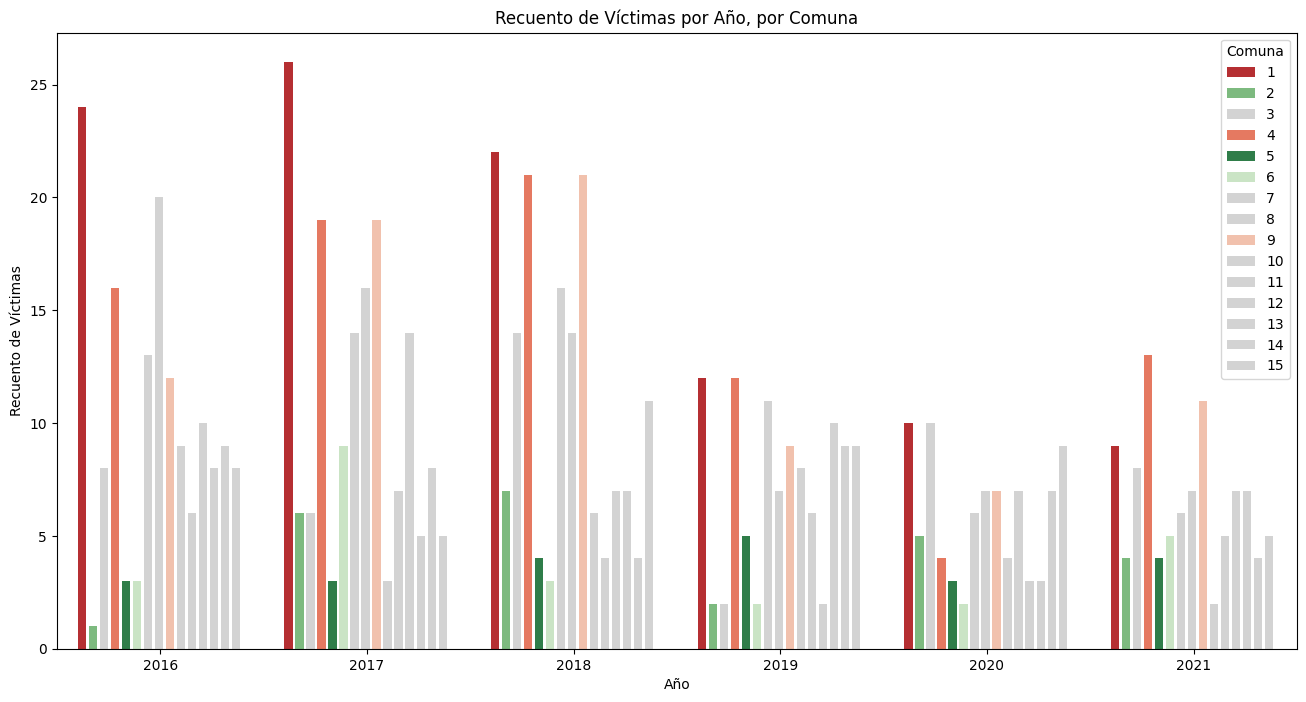

In [10]:
# Calcular las víctimas totales por comuna
df_homicidios['Total Víctimas'] = df_homicidios.groupby('Comuna')['Nro Víctimas'].transform('sum')

# Identificar las comunas con mayor y menor cantidad de víctimas totales
comunas_con_mas_victimas = df_homicidios.groupby('Comuna')['Total Víctimas'].sum().nlargest(3)
comunas_con_menos_victimas = df_homicidios.groupby('Comuna')['Total Víctimas'].sum().nsmallest(3)

# Crear una escala de colores para las comunas con más y menos víctimas
colores_mas_victimas = sns.color_palette("Reds_r", 3)  # De más claro a más oscuro
colores_menos_victimas = sns.color_palette("Greens", 3)  # De más oscuro a más claro

# Asignar colores a las comunas
palette_dict = {}
for comuna in df_homicidios['Comuna'].unique():
    if comuna in comunas_con_mas_victimas.index:
        # Asignar el color según el orden de las víctimas
        idx = comunas_con_mas_victimas.index.get_loc(comuna)
        palette_dict[comuna] = colores_mas_victimas[idx]
    elif comuna in comunas_con_menos_victimas.index:
        # Asignar el color según el orden inverso de las víctimas
        idx = comunas_con_menos_victimas.index.get_loc(comuna)
        palette_dict[comuna] = colores_menos_victimas[::-1][idx]
    else:
        palette_dict[comuna] = 'lightgrey'

# Crear el gráfico
plt.figure(figsize=(16, 8))
ax = sns.countplot(data=df_homicidios, x='Año', hue='Comuna', palette=palette_dict)

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Recuento de Víctimas')
plt.title('Recuento de Víctimas por Año, por Comuna')

# Ajustar el ancho de las columnas
for patch in ax.patches:
    patch.set_width(0.04)

# Mostrar el gráfico
plt.show()

Se puede observar que a lo largo de los años, las comunas 1 (Retiro, San Nicolás, Puerto Madero, San Telmo, Montserrat y Constitución), 4 (La Boca, Barracas, Parque Patricios y Nueva Pompeya) y 9 (Liniers, Mataderos y Parque Avellaneda), son las comunas con la mayor cantidad de víctimas, y las comunas 5 (Almagro y Boedo), 2 (Recoleta) y 6 (Caballito), son las comunas con un menor número de víctimas en accidentes de transito. Habría que hacer una investigación mas profunda, comparando estos datos con la densidad poblacional, quizás también con la cantidad de barrios y kilómetros cuadrados de las comunas, pudiendo influir en la cantidad de víctimas por comuna.

<br>
<br>

Gráfico de mapa de calor para los totales de incidentes por día de la semana y franja horaria

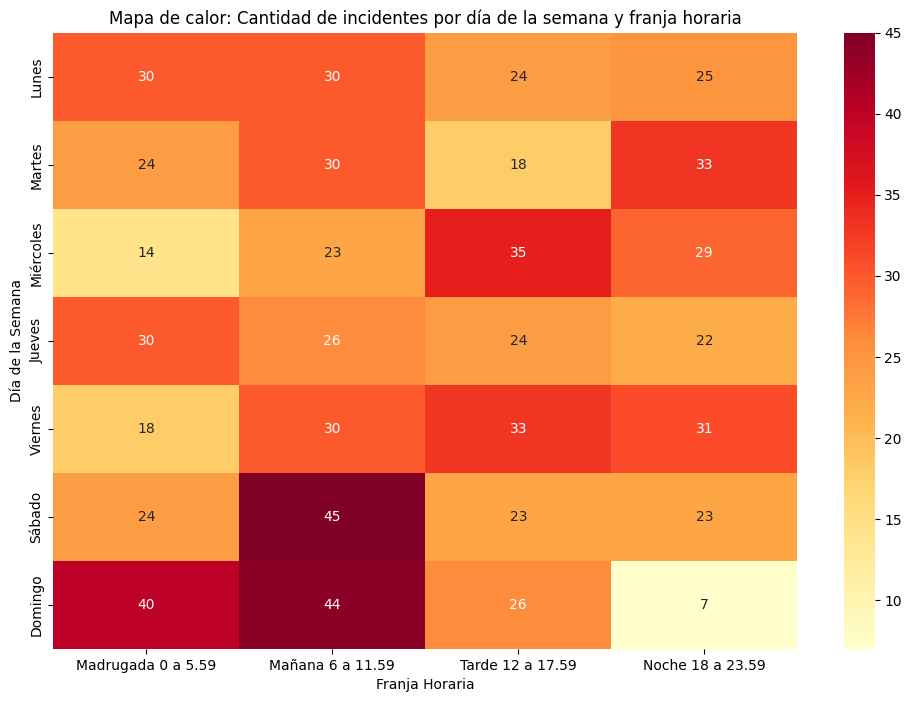

In [11]:
# Crear una nueva columna 'FRANJA_HORARIA' en función de la hora
def asignar_franja_horaria(hora):
    hora = int(hora)  # Convertir la hora a un valor numérico (int)
    if 0 <= hora < 6:
        return 'Madrugada'
    elif 6 <= hora < 12:
        return 'Mañana'
    elif 12 <= hora < 18:
        return 'Tarde'
    else:
        return 'Noche'

df_homicidios['Franja Horaria'] = df_homicidios['Hora'].apply(asignar_franja_horaria)

# Crear un gráfico de mapa de calor para los totales
pivot_table = df_homicidios.pivot_table(index='Día', columns='Franja Horaria', aggfunc='size', fill_value=0)
dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
pivot_table = pivot_table.reindex(dias_semana)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt='d', cbar=True)
plt.xlabel('Franja Horaria')
plt.ylabel('Día de la Semana')
plt.title('Mapa de calor: Cantidad de incidentes por día de la semana y franja horaria')
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=['Madrugada 0 a 5.59', 'Mañana 6 a 11.59', 'Tarde 12 a 17.59', 'Noche 18 a 23.59'])
plt.show()

A partir de este mapa de calor que mide la correlación entre la cantidad de víctimas según el día y la franja horaria del mismo, podemos sacar una rápida, pero leve, conclusión de que en los fines de semana, donde gran número de personas sale a comer afuera, o realiza fiestas, o sale a bailar, y acompañado de la ingesta de bebidas alcohólicas, produce un mayor numero de víctimas. Cabe recordar que no todos los involucrados en el accidente necesariamente deben haber ingerido bebidas alcohólicas, pero está claro que tiene mucho que ver, y podría ser un punto clave a atacar para intentar disminuir la cantidad de víctimas fatales en la ciudad de buenos aires. Existe una distribución bastante pareja en el resto de los días, y franjas horarias, por lo que no se puede analizar nigún patrón específico. 

<br>
<br>

Gráfico de cantidad de víctimas por mes, según el año.

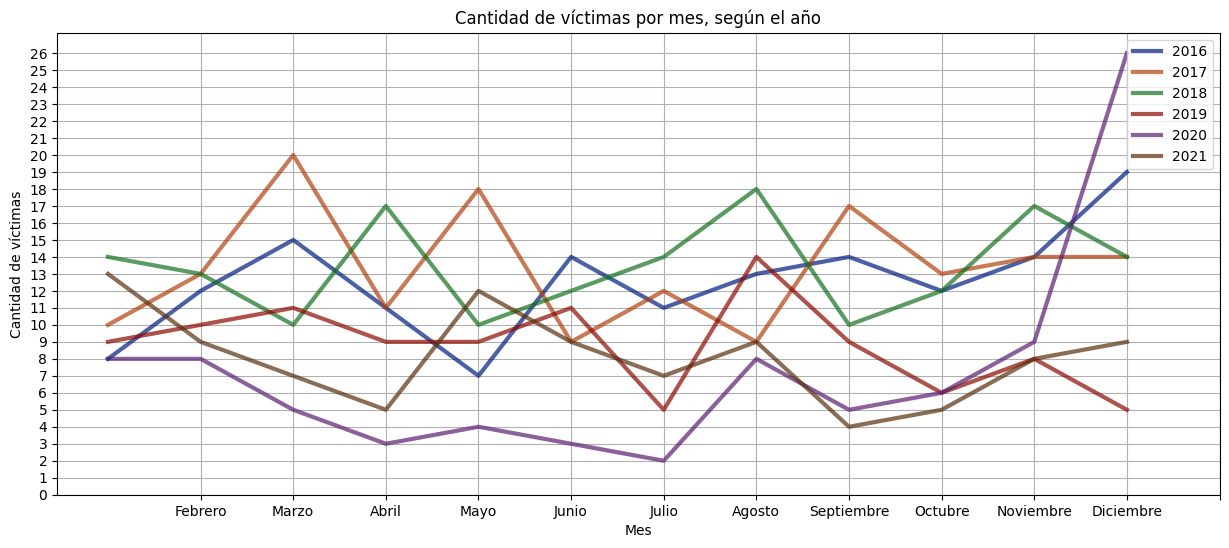

In [12]:
# Definir el orden de los meses
orden_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Contar la cantidad de filas por año y mes
counts = df_homicidios.groupby(['Año', 'Mes']).size().unstack(fill_value=0)

# Reordenar los meses
counts = counts[orden_meses]

# Crear el gráfico de líneas con un grosor uniforme y paleta de colores modificada
plt.figure(figsize=(15, 6))
for year in counts.index:
    plt.plot(counts.columns, counts.loc[year], label=str(year), linewidth=3, alpha=0.7)  # Grosor uniforme y transparencia
sns.set_palette("Set2")  # Cambiar la paleta de colores
plt.xlabel('Mes')
plt.ylabel('Cantidad de víctimas')
plt.title('Cantidad de víctimas por mes, según el año')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 13))
plt.yticks(range(0, max(counts.values.max(), 1) + 1))  # Set y-ticks as integers
plt.show()

Se puede observar que el año 2020 venía con unos valores muy bajos, que coinciden con el confinamiento por la pandemia de covid, que fue estricta durante los primeros meses, pero que en base a los números podemos concluir que no fué respetada a partir de agosto, y teniendo un pico de víctimas en diciembre, coincidente con las fiestas de navidad y año nuevo, donde la gente salió de sus hogares. No se logra ver ningún patrón o aspecto llamativo en el resto de los años. 

<br>
<br>

Gráfico donde se analiza el tipo de calle donde ocurre el accidente

<br>
<br>

#### Se carga el dataset limpio

In [13]:
df_homicidios.to_csv(r"C:\Users\Cebol\OneDrive\Escritorio\PI_02_siniestros\Datasets\homicidios_limpio.csv", index=False, encoding='utf-8')